### <center> **Wholesale Customers Data Analysis** </center>

---

**<center> Author: Aravindan Natarajan </center>**
**<center>Version: 2.0</center>**

---

### **Data Summary**

The dataset used in this notebook is a wholesale customer data, containing information about the spending habits of customers across different regions and channels (Hotel/Retail). It includes the annual spending on various product categories like Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicatessen. The dataset aims to understand customer behavior and preferences to optimize sales and marketing strategies.

### **1. Import the Required Libraries**
---

In [1]:
# Import basic packages
import pandas as pd
import numpy as np

# Import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', color_codes=True)
%matplotlib inline

# Import statistical packages
from scipy.stats import variation

# Warning handling
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Annotation function to display the numbers above bar for bargraphs

def annotate_values(ax, orientation='v'):
  # Display counts at the top of the bars
  for p in ax.patches:
        if orientation == 'v':
            ax.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 10),
                        textcoords='offset points',
                        fontsize=8)

        elif orientation == 'h':
            ax.annotate(format(p.get_width(), '.0f'),
                        (p.get_width(), p.get_y() + p.get_height() / 2.),
                        ha='left', va='center',
                        xytext=(5, 0),
                        textcoords='offset points',
                        fontsize=8)

In [3]:
# Function for plotting a countplot

def plot_countplot(df, column, hue=None, hue_order=None):
  plt.figure(figsize=(10, 6))

  # If hue is provided, use it in the countplot
  if hue:
    counts = df.groupby([column, hue]).size().reset_index(name='count')
    order = counts.sort_values('count', ascending=False)[column].unique()
    ax = sns.countplot(x=column, data=df, order=order, hue=hue, hue_order=hue_order)
  else:
    counts = df[column].value_counts().sort_values(ascending=False)
    ax = sns.countplot(x=column, data=df, order=counts.index)

  plt.xticks(rotation=90)
  plt.title(f'Count Plot of {column}')
  plt.xlabel(f'{column}')
  plt.ylabel(f'Count of {column}')
  annotate_values(ax)
  plt.show()

In [4]:
# Function similar to plot_countplot named as plot_barplot

def plot_barplot(df, x_col, y_col, hue=None, hue_order=None):
    plt.figure(figsize=(10, 6))

    # Sort x_col values in ascending order
    order = df[x_col].sort_values().unique()

    if hue:
        ax = sns.barplot(x=x_col, y=y_col, data=df, hue=hue, hue_order=hue_order, order=order, palette='Set1',ci=None)  # ci=None removes error bars
    else:
        ax = sns.barplot(x=x_col, y=y_col, data=df, order=order, palette='Set1', ci=None)

    plt.xticks(rotation=90)
    plt.title(f'Bar Plot of {y_col} vs {x_col}')
    plt.xlabel(f'{x_col}')
    plt.ylabel(f'{y_col}')
    annotate_values(ax)
    plt.show()


In [ ]:
# Function to annotate a Seaborn box plot with quartiles, IQR, maximum, and minimum values.

def annotate_boxplot(data_series, ax=None):

    # Calculate quartiles and IQR
    q1, q2, q3 = data_series.quantile([0.25, 0.5, 0.75])
    iqr = q3 - q1

    # Get minimum and maximum values
    data_min = data_series.min()
    data_max = data_series.max()

    # Get plot limits
    x_min, x_max = ax.get_xlim()
    x_range = x_max - x_min

    # Adjust figure size based on x-range
    fig = plt.gcf()
    fig.set_size_inches(10 + x_range/20, 15)  # Adjust these values as needed

    # Annotate quartiles and IQR without arrows
    ax.text(q1, -0.3, f"Q1: {q1:.2f}", ha='center')
    ax.text(q2, 0.3, f"Q2 (Median): {q2:.2f}", ha='center')
    ax.text(q3, -0.4, f"Q3: {q3:.2f}", ha='center')
    #ax.text((q1+q3)/2, 0.3, f"IQR: {iqr:.2f}", ha='center', va='center')

    # Annotate minimum and maximum without arrows
    ax.text(data_min, -0.2, f"Min: {data_min:.2f}", ha='center')
    ax.text(data_max, 0.1, f"Max: {data_max:.2f}", ha='center')

    return ax

### **2. Import the Dataset**
---

In [ ]:
# Load the data
wcd_df = pd.read_csv(r"..data/Wholesale_Customers_Data.csv")
wcd_df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


### **3. Exploratory Data Analysis(EDA)**
---

In [7]:
# Check for null values in the dataset
wcd_df.isnull().any().any()

False

In [8]:
# Information on the dataset
wcd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


As there are no null values present in the dataset and the dataset is clean. Therefore, we can proceed further with other analysis

In [29]:
# 5 point statistical summary of the dataset
# Select numerical columns excluding 'Buyer/Spender'
numerical_cols = wcd_df.select_dtypes(include=np.number).columns
numerical_cols = numerical_cols[numerical_cols != 'Buyer/Spender']
wcd_stat_df = wcd_df[numerical_cols].describe().T
wcd_stat_df

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


### **3a. Data Visualization**

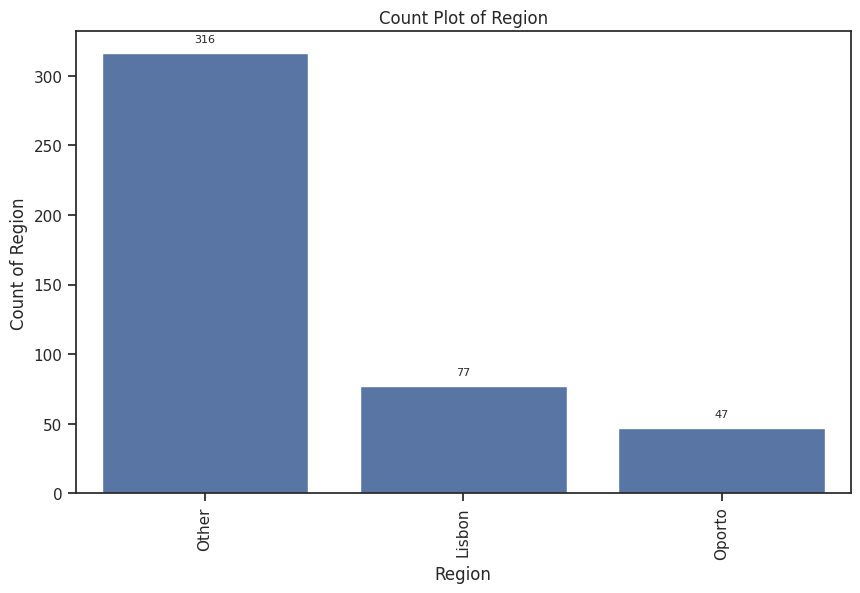

In [10]:
# Countplot for region
plot_countplot(wcd_df, 'Region')

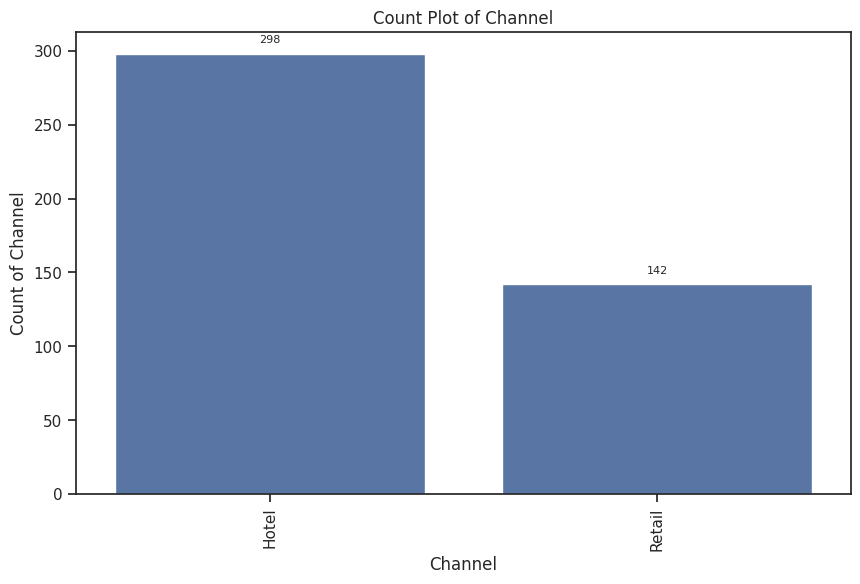

In [11]:
# Countplot for channel
plot_countplot(wcd_df, 'Channel')

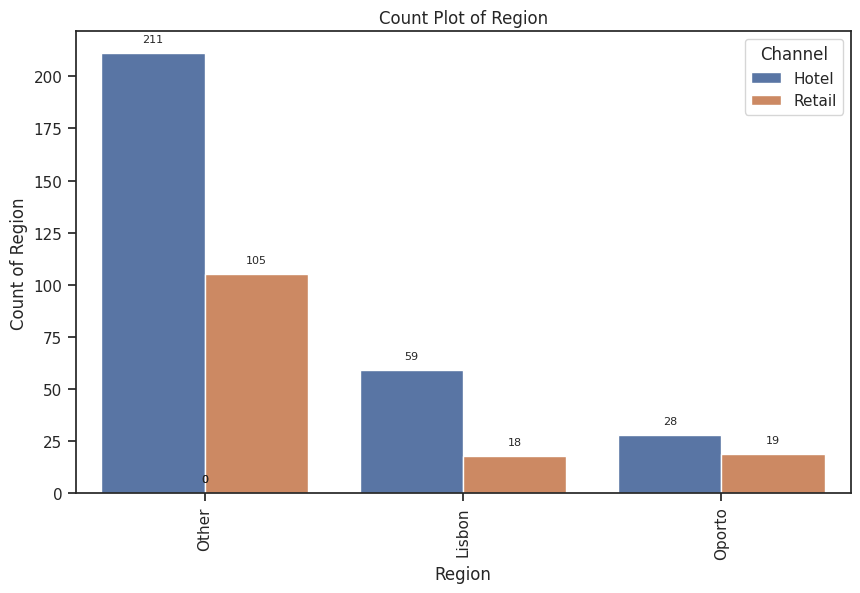

In [12]:
# Count plot for the Region with the channel as hues
plot_countplot(wcd_df, 'Region', hue='Channel', hue_order=['Hotel','Retail'])

The other region featured most in the dataset while most of the customers are from hotel segment. Now let us figure out which region spent the most and least under which channel.

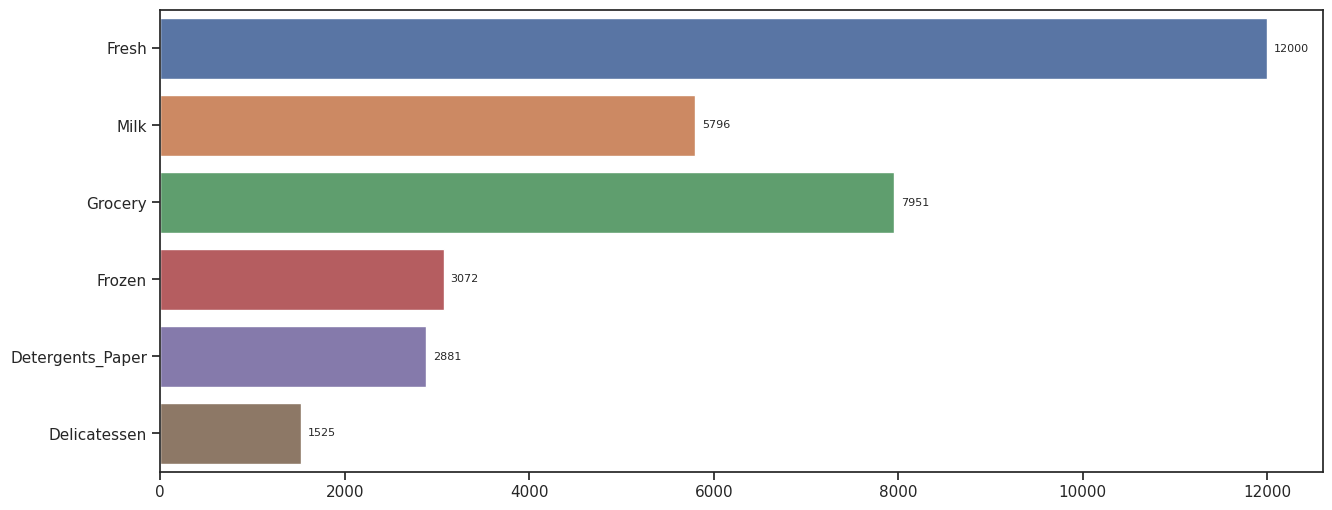

In [13]:
# If we don't specify an estimator within the sns.barplot() function, it defaults to using the mean.
columns_to_plot = [col for col in wcd_df.columns if col != 'Buyer/Spender']
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=wcd_df[columns_to_plot], orient='h', ci=None)  # Store the Axes object
annotate_values(ax, orientation='h')
plt.show()

In [14]:
spend_df = pd.pivot_table(
    wcd_df,
    index=['Region', 'Channel'],
    values=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'],
    aggfunc=np.sum
)
spend_df['Total_Spending'] = spend_df.sum(axis=1)
spend_df = spend_df.reset_index()
spend_df

,Region,Channel,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total_Spending
0,Lisbon,Hotel,70632,56081,761233,184512,237542,228342,1538342
1,Lisbon,Retail,33695,148055,93600,46514,332495,194112,848471
2,Oporto,Hotel,30965,13516,326215,160861,123074,64519,719150
3,Oporto,Retail,23541,159795,138506,29271,310200,174625,835938
4,Other,Hotel,320358,165990,2928269,771606,820101,735753,5742077
5,Other,Retail,191752,724420,1032308,158886,1675150,1153006,4935522


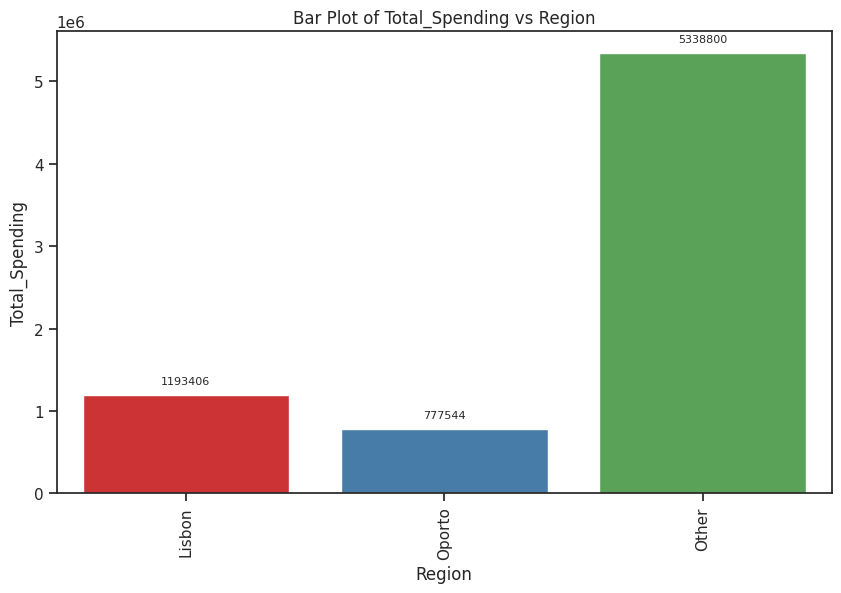

In [15]:
# Visualize the total spending across regions
plot_barplot(df=spend_df, x_col= 'Region', y_col='Total_Spending');

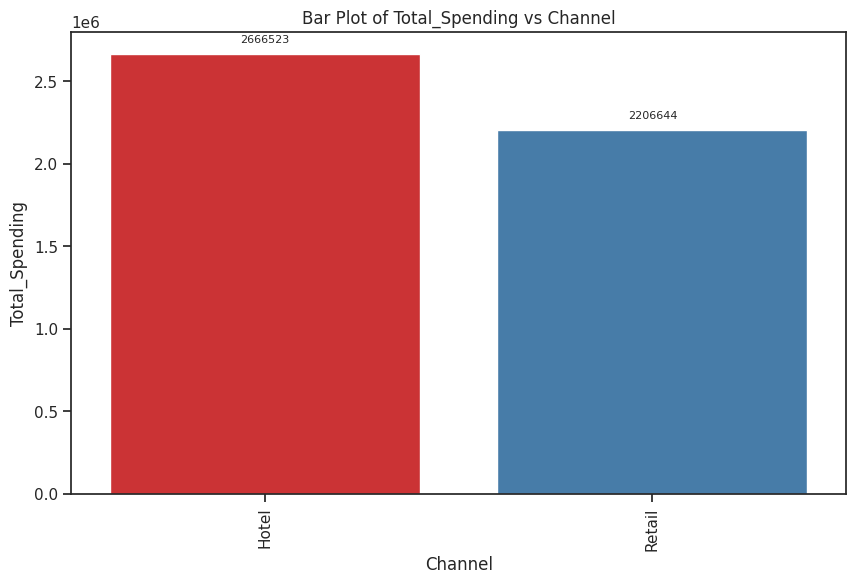

In [16]:
# Visualize the total spending across channels
plot_barplot(df=spend_df, x_col= 'Channel', y_col='Total_Spending');

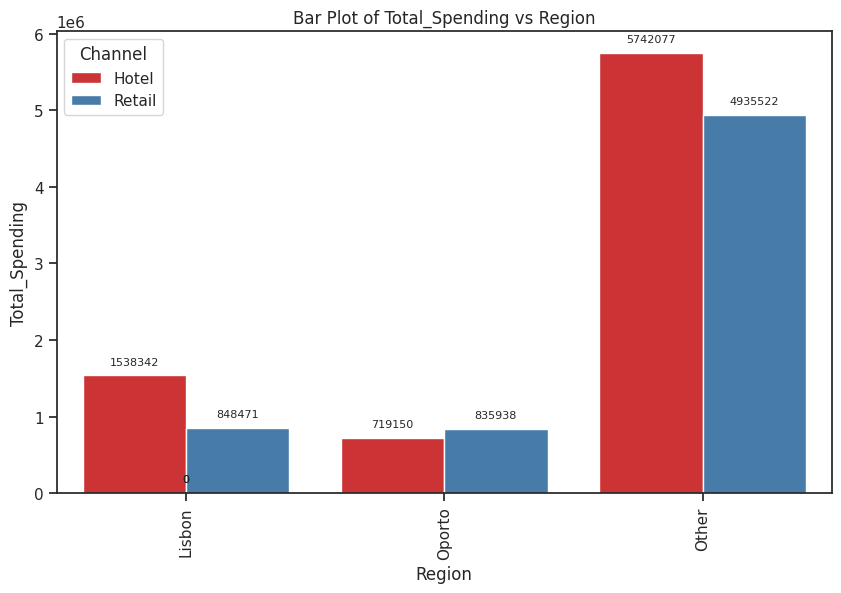

In [17]:
# Visualize the total spending across regions using a bar plot
plot_barplot(df=spend_df, x_col= 'Region', y_col='Total_Spending', hue='Channel');

There are 6 different varieties of items that are in the dataset. Let us now understand the spending across regions and channels for these.

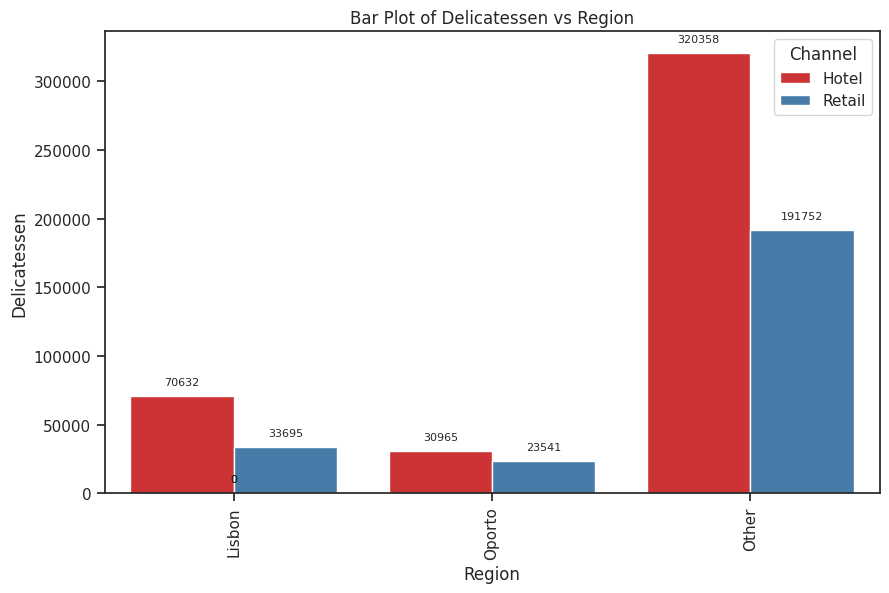

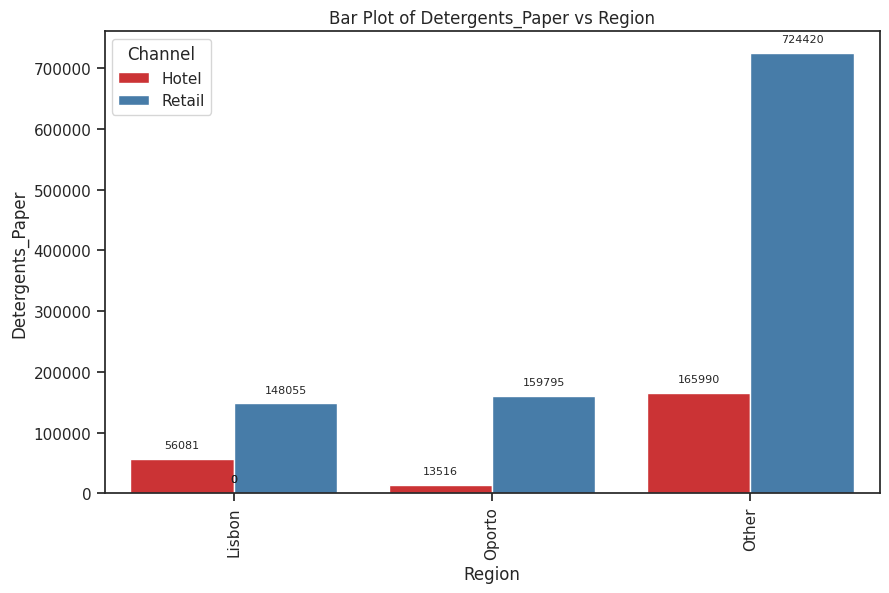

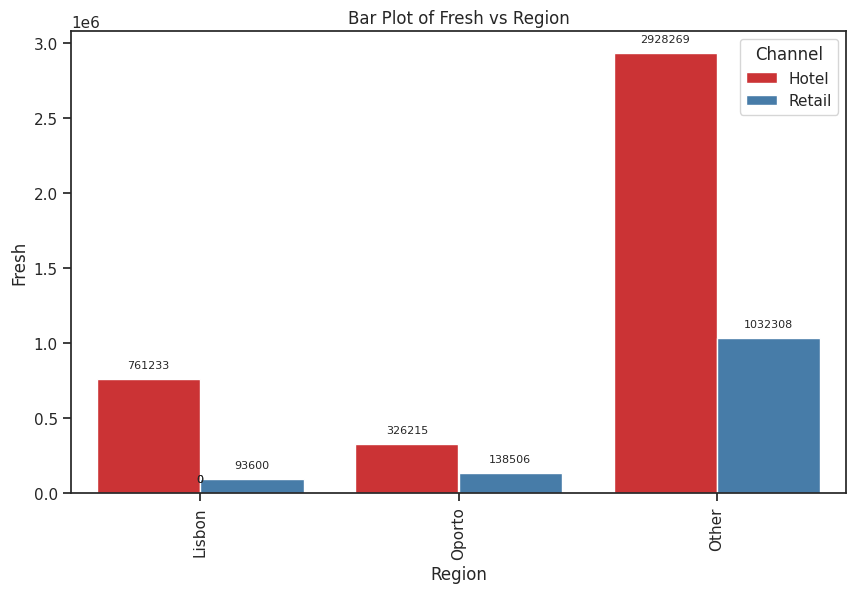

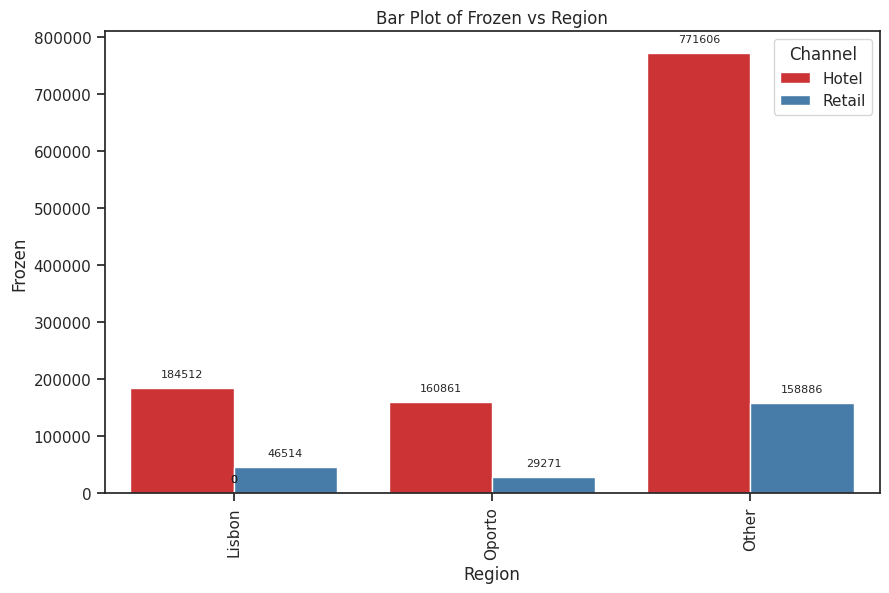

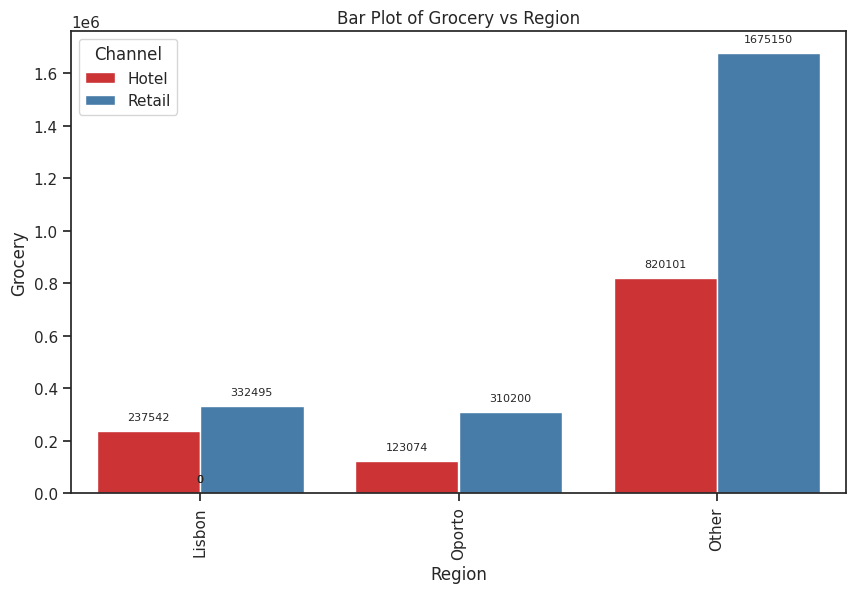

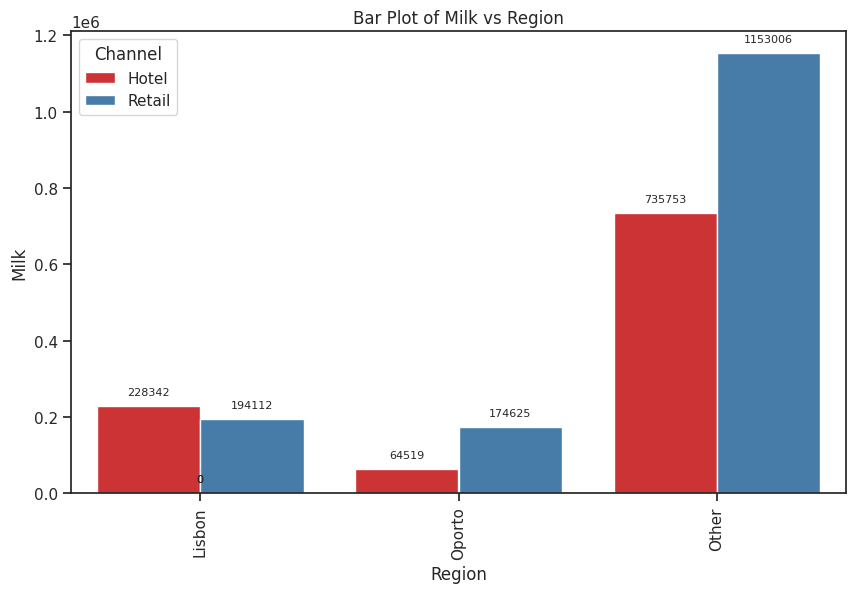

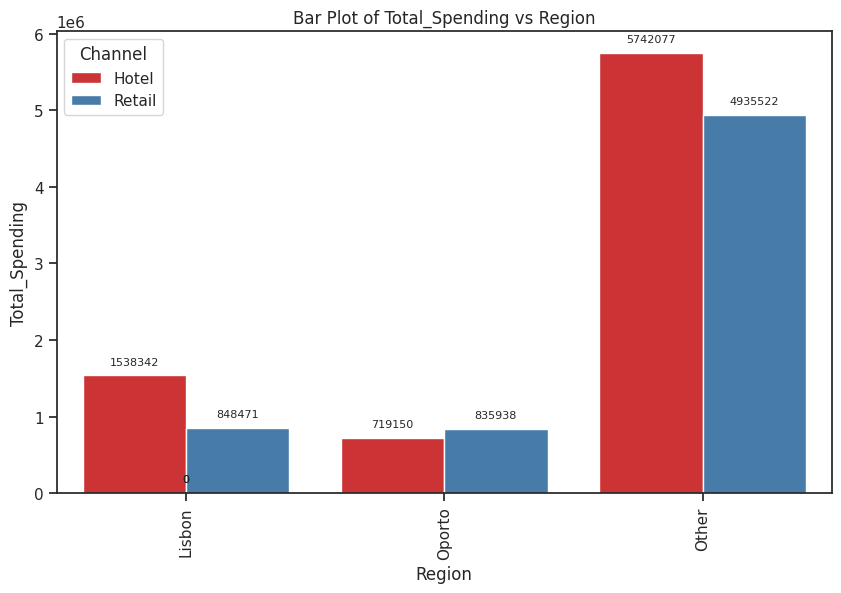

In [18]:
for col in spend_df.columns:
  if col not in ['Region', 'Channel']:  # Exclude 'Region' and 'Channel'
    plot_barplot(df=spend_df, x_col='Region', y_col=col, hue='Channel')

Now let us find out which items displayed most or least inconsistency. In essence we want to find out the variability as Variability refers to how spread out the data is. A higher variability means the data points are more spread out from the average, indicating more inconsistency. Moreover, the Coefficient of Variation (CV) is a useful measure of relative variability. It is calculated as the standard deviation divided by the mean. A higher CV indicates higher variability.

In [22]:
cov_spend_df = spend_df.drop(columns='Total_Spending').describe().T
cov_spend_df

,count,mean,std,min,25%,50%,75%,max
Delicatessen,6.0,111823.833333,1.200066e+05,23541.0,31647.50,52163.5,161472.00,320358.0
Detergents_Paper,6.0,211309.500000,2.589244e+05,13516.0,79074.50,153925.0,164441.25,724420.0
Fresh,6.0,880021.833333,1.068422e+06,93600.0,185433.25,543724.0,964539.25,2928269.0
Frozen,6.0,225275.000000,2.753430e+05,29271.0,74607.00,159873.5,178599.25,771606.0
Grocery,6.0,583093.666667,5.860127e+05,123074.0,255706.50,321347.5,698199.50,1675150.0
Milk,6.0,425059.500000,4.268906e+05,64519.0,179496.75,211227.0,608900.25,1153006.0


In [25]:
# Calculate coefficient of variation
cov_spend_df['COV'] = cov_spend_df['std'] / cov_spend_df['mean']

# Display cov_spend_df with the new 'COV' column
cov_spend_df

,count,mean,std,min,25%,50%,75%,max,COV
Delicatessen,6.0,111823.833333,1.200066e+05,23541.0,31647.50,52163.5,161472.00,320358.0,1.073175
Detergents_Paper,6.0,211309.500000,2.589244e+05,13516.0,79074.50,153925.0,164441.25,724420.0,1.225333
Fresh,6.0,880021.833333,1.068422e+06,93600.0,185433.25,543724.0,964539.25,2928269.0,1.214086
Frozen,6.0,225275.000000,2.753430e+05,29271.0,74607.00,159873.5,178599.25,771606.0,1.222253
Grocery,6.0,583093.666667,5.860127e+05,123074.0,255706.50,321347.5,698199.50,1675150.0,1.005006
Milk,6.0,425059.500000,4.268906e+05,64519.0,179496.75,211227.0,608900.25,1153006.0,1.004308


In [30]:
# Select numerical columns excluding 'Buyer/Spender'
numerical_cols = wcd_df.select_dtypes(include=np.number).columns
numerical_cols = numerical_cols[numerical_cols != 'Buyer/Spender']

# Calculate COV for each numerical column
cov_values = wcd_df[numerical_cols].apply(lambda x: x.std() / x.mean())

# Add COV values to wcd_stat_df as a new column
wcd_stat_df['COV'] = cov_values

# Display wcd_stat_df with the new 'COV' column
wcd_stat_df

,count,mean,std,min,25%,50%,75%,max,COV
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,1.053918
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,1.273299
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,1.195174
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,1.580332
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,1.654647
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,1.849407


### **3c. Outlier Analysis**

In [32]:
wcd_drop_df = wcd_df.drop(columns=['Buyer/Spender', 'Channel', 'Region'])
wcd_drop_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


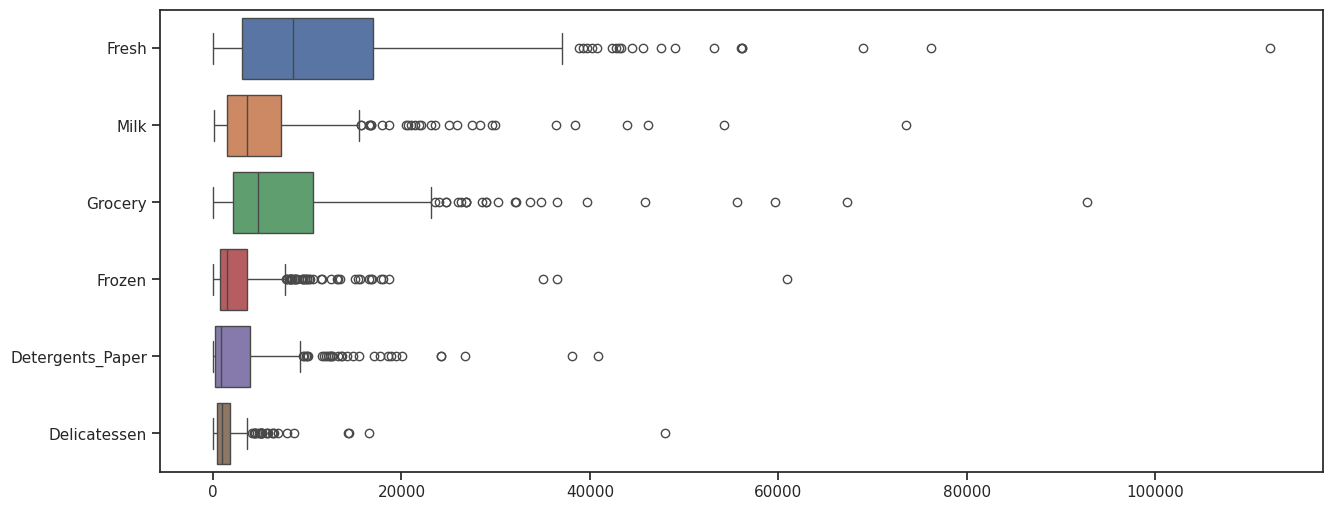

In [34]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=wcd_drop_df, orient='h');
plt.show()

In [35]:
# Calculate IQR
Q1 = wcd_drop_df.quantile(0.25)
Q3 = wcd_drop_df.quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower limits
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# Create outlier dataframe
outlier_df = pd.DataFrame()
outlier_df['% Upper Outlier'] = ((wcd_drop_df > upper_limit).sum() / len(wcd_drop_df) * 100)
outlier_df['% Lower Outlier'] = ((wcd_drop_df < lower_limit).sum() / len(wcd_drop_df) * 100)
outlier_df['% Total Outlier'] = outlier_df['% Upper Outlier'] + outlier_df['% Lower Outlier']

# Sort by total outlier percentage
outlier_df.sort_values(by='% Total Outlier', ascending=False)

,% Upper Outlier,% Lower Outlier,% Total Outlier
Frozen,9.772727,0.0,9.772727
Detergents_Paper,6.818182,0.0,6.818182
Milk,6.363636,0.0,6.363636
Delicatessen,6.136364,0.0,6.136364
Grocery,5.454545,0.0,5.454545
Fresh,4.545455,0.0,4.545455


### **Business Recommendations**

* Focus on hotels in the other region: The hotel channel in the other region show the highest total spending. Target marketing and promotional efforts towards hotels in this region to maximize sales and potentially increase market share.
* Optimize product offerings for each channel: There are distinct spending patterns for different products across channels. Tailor product assortment and promotions to match the specific needs and preferences of Hotel and Retail customers. For instance, hotels have higher spending in fresh, frozen, and delicatessen products.
* Address spending discrepancies across regions: Lisbon shows significantly lower spending in certain product categories. Investigate the reasons for this and implement strategies to improve sales, such as introducing new products or adjusting pricing.
* Manage inventory for products with high variability: Products like fresh and frozen goods exhibit higher variability in spending. Implement robust inventory management systems to minimize stockouts and spoilage, while ensuring sufficient supply to meet demand.
* Investigate outliers: There are outliers in the data for certain products. Further investigate these outliers to understand the reasons for the extreme spending patterns. This might reveal valuable insights into customer behavior and potential opportunities for growth.